In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

In [73]:
df = pd.read_excel('./data/Bitcoin_5_14_2010-5_19_2025_historical_data_coinmarketcap.xlsx')
df = df.sort_values('timestamp')
df.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
5423,2010-07-14T00:00:00.000Z,2010-07-14T23:59:59.999Z,2010-07-14T00:34:00.000Z,2010-07-14T19:24:00.000Z,2781,0.058157,0.061588,0.048647,0.056402,261.54,190259.65,2010-07-14T23:59:59.999Z
5422,2010-07-15T00:00:00.000Z,2010-07-15T23:59:59.999Z,2010-07-15T11:39:00.000Z,2010-07-15T00:41:00.000Z,2781,0.056403,0.067954,0.053969,0.057568,445.80,195982.14,2010-07-15T23:59:59.999Z
5421,2010-07-16T00:00:00.000Z,2010-07-16T23:59:59.999Z,2010-07-16T02:11:00.000Z,2010-07-16T00:24:00.000Z,2781,0.058001,0.072220,0.057484,0.066492,497.25,228047.42,2010-07-16T23:59:59.999Z
5420,2010-07-17T00:00:00.000Z,2010-07-17T23:59:59.999Z,2010-07-17T06:51:00.000Z,2010-07-17T16:21:00.000Z,2781,0.066500,0.077735,0.057418,0.065993,19.99,226904.80,2010-07-17T23:59:59.999Z
5419,2010-07-18T00:00:00.000Z,2010-07-18T23:59:59.999Z,2010-07-18T17:38:00.000Z,2010-07-18T00:28:00.000Z,2781,0.066088,0.080858,0.064221,0.078814,75.13,271669.20,2010-07-18T23:59:59.999Z


In [74]:
df = df.drop(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name'], axis=1)
df.head()

,open,high,low,close,volume,marketCap,timestamp
5423,0.058157,0.061588,0.048647,0.056402,261.54,190259.65,2010-07-14T23:59:59.999Z
5422,0.056403,0.067954,0.053969,0.057568,445.80,195982.14,2010-07-15T23:59:59.999Z
5421,0.058001,0.072220,0.057484,0.066492,497.25,228047.42,2010-07-16T23:59:59.999Z
5420,0.066500,0.077735,0.057418,0.065993,19.99,226904.80,2010-07-17T23:59:59.999Z
5419,0.066088,0.080858,0.064221,0.078814,75.13,271669.20,2010-07-18T23:59:59.999Z


In [75]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek

In [76]:
X = df[['open', 'high', 'low', 'volume', 'marketCap', 'year', 'month', 'day', 'day_of_week']]
y = df['close']
print(X)

                                           open           high            low  \
timestamp                                                                       
2010-07-14 23:59:59.999000+00:00       0.058157       0.061588       0.048647   
2010-07-15 23:59:59.999000+00:00       0.056403       0.067954       0.053969   
2010-07-16 23:59:59.999000+00:00       0.058001       0.072220       0.057484   
2010-07-17 23:59:59.999000+00:00       0.066500       0.077735       0.057418   
2010-07-18 23:59:59.999000+00:00       0.066088       0.080858       0.064221   
...                                         ...            ...            ...   
2025-05-15 23:59:59.999000+00:00  103538.825684  104153.619877  101440.812464   
2025-05-16 23:59:59.999000+00:00  103735.655063  104533.486651  103137.478737   
2025-05-17 23:59:59.999000+00:00  103489.289736  103716.948988  102659.177081   
2025-05-18 23:59:59.999000+00:00  103186.955636  106597.168134  103142.604579   
2025-05-19 23:59:59.999000+0

In [77]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [78]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [80]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = ((abs(y_test - y_pred) / y_test).mean()) * 100
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}%')
print(f'R-squared: {r2}')
print(f'Accuracy: {accuracy}%')

Mean Squared Error: 143378943.76705617
Mean Absolute Error: 5785.296117183181
Mean Absolute Percentage Error: 7.318355767217495%
R-squared: 0.8052810312770915
Accuracy: 80.52810312770914%


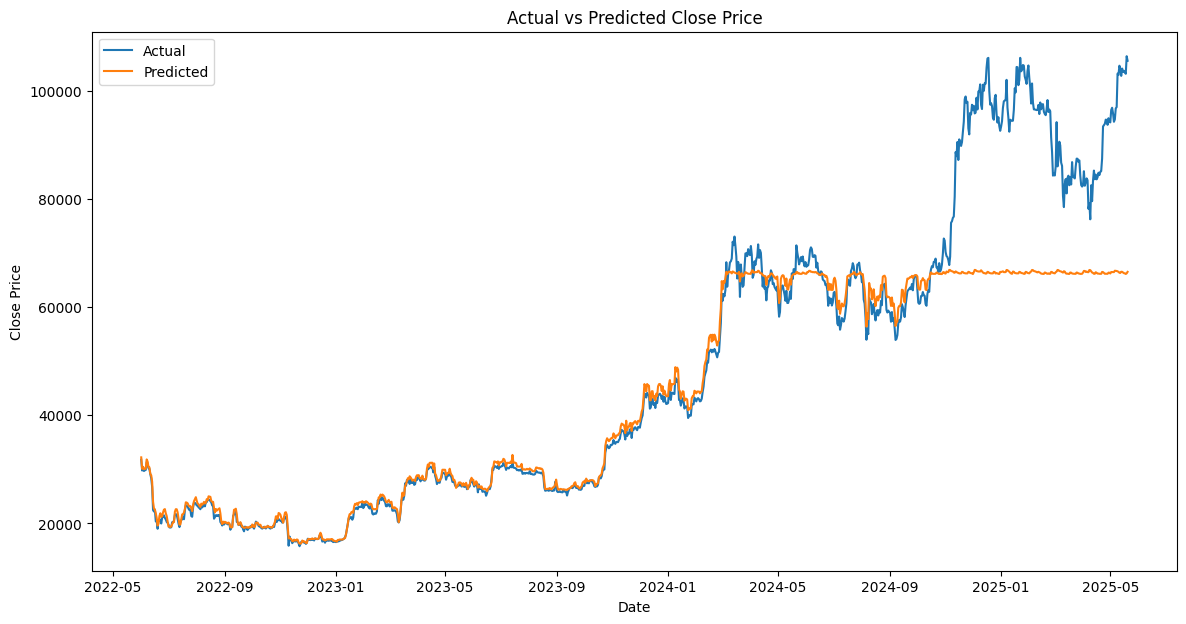

In [81]:
# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()